In [ ]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


# 프로젝트 : 인공지능으로 세상에 없던 새로운 패션 만들기

**이게 요즘 유행한다던 그림 그려주는 AI라면서요?**

## 1. 데이터 준비하기

## 2. 모델 설계하기

## 3. 모델 학습하기

## 4. 모델 학습 결과

- - -
### 데이터 준비하기

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

데이터를 불러와줍시다. 32x32픽셀 3채널 RGB값을 가진 이미지가 50000장 있습니다.

In [ ]:
train_x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

이미지 데이터의 정보는 데이터 배열 그 자체인 것을 확인할 수 있습니다.

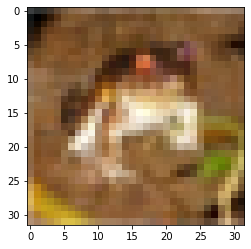

In [ ]:
plt.imshow(train_x[0])
plt.show()

첫 번째 데이터를 이미지로 불러오니 개구리로 추정되는 몬스터가 나왔습니다.

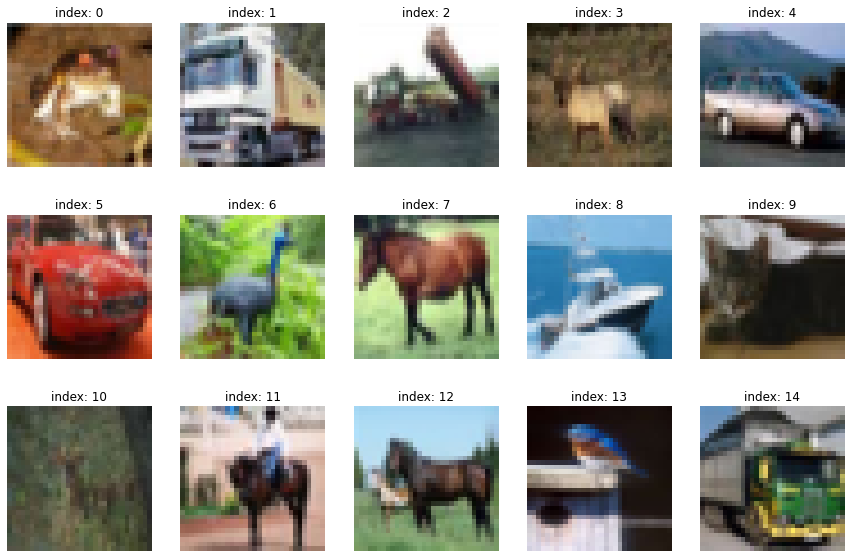

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(train_x[i])
    plt.title(f'index: {i}')
    plt.axis('off') # x, y 눈금 제거
    
plt.show()

첫 번째 데이터만 불러오지 말고 한 번에 15장의 데이터를 불러와봤습니다.

개구리, 트럭, 사슴, 차, 공작(?), 말, 보트, 고양이, 새. 그리고 정체를 알 수 없는 무엇까지 다양하게 있습니다.

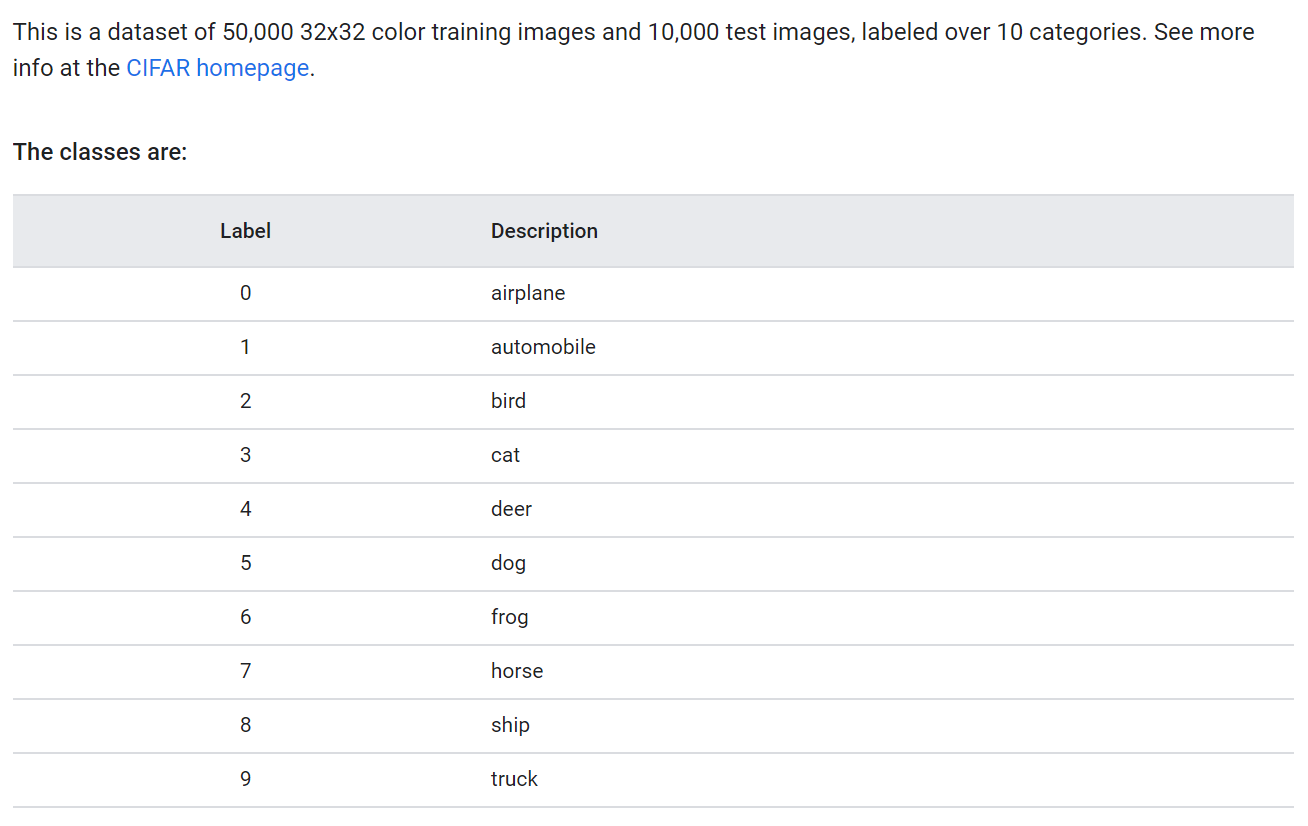

cifar10에서 확인해본 결과

- 0 : 비행기
- 1 : 자동차
- 2 : 새
- 3 : 고양이
- 4 : 사슴
- 5 : 개
- 6 : 개구리
- 7 : 말
- 8 : 보트
- 9 : 트럭

이 준비되어 있다고 합니다.

In [ ]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

train_x.shape

max pixel: 1.0
min pixel: -1.0


(50000, 32, 32, 3)

tanh를 쓰기 위해 -1에서 1 사이의 값으로 정규화를 해줍니다.

In [ ]:
train_x[0][0]

array([[-0.5372549 , -0.51372549, -0.50588235],
       [-0.6627451 , -0.63921569, -0.64705882],
       [-0.60784314, -0.62352941, -0.6627451 ],
       [-0.46666667, -0.57647059, -0.67058824],
       [-0.23137255, -0.42745098, -0.59215686],
       [-0.06666667, -0.28627451, -0.50588235],
       [ 0.09019608, -0.16078431, -0.41176471],
       [ 0.1372549 , -0.1372549 , -0.37254902],
       [ 0.16862745, -0.08235294, -0.30196078],
       [ 0.16862745, -0.05882353, -0.27058824],
       [ 0.02745098, -0.19215686, -0.39607843],
       [-0.01960784, -0.22352941, -0.40392157],
       [ 0.11372549, -0.09803922, -0.28627451],
       [ 0.12941176, -0.12156863, -0.3254902 ],
       [ 0.0745098 , -0.17647059, -0.38039216],
       [ 0.01176471, -0.23921569, -0.44313725],
       [ 0.0745098 , -0.16862745, -0.38039216],
       [ 0.05098039, -0.16862745, -0.40392157],
       [-0.02745098, -0.23921569, -0.49803922],
       [ 0.09019608, -0.11372549, -0.38823529],
       [ 0.09019608, -0.12156863, -0.411

정규화를 하고 나서의 이미지 배열 값들입니다.

왜 굳이 *0 ~ 1*이 아닌 *-1 ~ 1*을?

라고 생각하신다면 이미 여러 논문이 `-1 ~ 1로 정규화를 하고 tanh를 썼더니 결과가 더 좋았더라` 하고 말하고 있기 때문입니다.

저도 sigmoid로 시도해보진 않았지만 제가 이해한 GAN의 원리 구조로는 tanh을 썼을 때 학습이 더 잘 되는 것이지

sigmoid를 쓴다고 해서 학습이 되지 않는다거나 하지는 않을 것 같습니다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

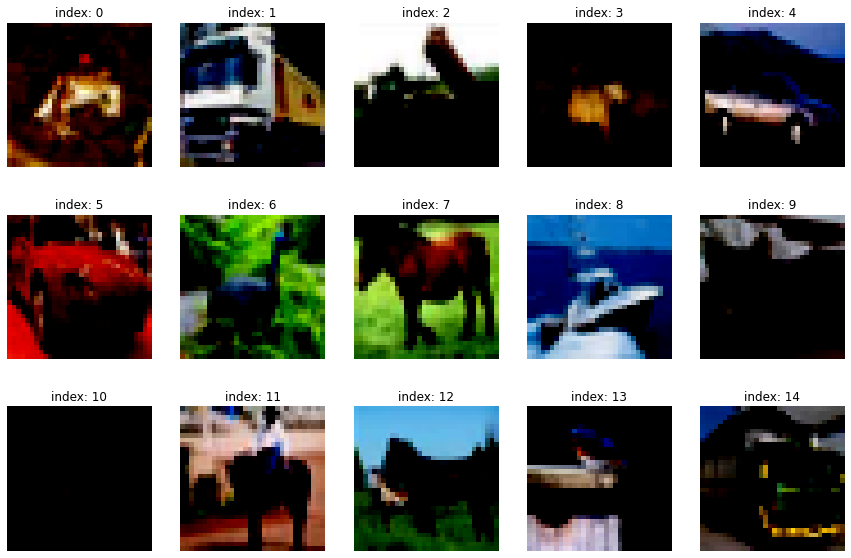

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(train_x[i]) # plt.imshow는 RGB 채널이 있는 데이터에 대해 음수를 받지 않음
    plt.title(f'index: {i}')
    plt.axis('off') # x, y 눈금 제거
    
plt.show()

그리고 정규화한 값을 이미지로 출력해보면 경고 문구가 표시되면서 이미지가 어두워져서 나옵니다.

이유는 `plt.imshow`가 RGB채널이 있는 이미지에 대해 음수 값을 받지 않기 때문인데요.

이미지로 표시하려면 다시 음수 정규화를 풀어줘야 할 것 같습니다.

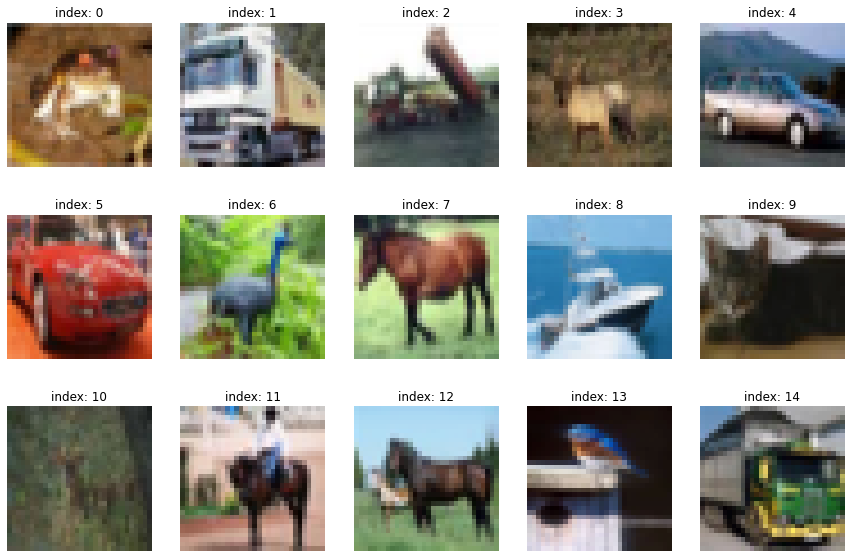

In [ ]:
tanh_nomr = lambda x: (x+1)/2 # 0 ~ 1 사이의 수로 다시 정규화

plt.figure(figsize=(15, 10))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(tanh_nomr(train_x[i]))
    plt.title(f'index: {i}')
    plt.axis('off') # x, y 눈금 제거
    
plt.show()

0에서 1 사이의 값으로 다시 정규화해주는 함수를 만들고 이미지를 출력하려고 할 때마다 위처럼 함수를 호출하겠습니다.

- - -
### 모델 설계하기

In [ ]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

데이터셋의 크기가 50000개였으니 `shuffle` 인자에 50000을 넣고 섷어줍니다.

배치 사이즈는 256으로 해줬습니다.

#### *생성자 모델*

In [ ]:
def make_generator_model(): # 생성자 모델

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*768, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 768)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(384, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(192, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

1채널이였던 MNIST에 비해 이번 데이터셋은 3채널로 늘어났습니다.

최종 출력층은 3으로 하고 다른 레이어들은 아직은 잘 모르니 무작정 값을 크게 줘봤습니다.

In [ ]:
generator = make_generator_model()

generator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 49152)             4915200   
_________________________________________________________________
batch_normalization_9 (Batch (None, 49152)             196608    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 49152)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 768)         0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 8, 8, 384)         7372800   
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 384)         1536      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 8, 8, 384)        

출력층을 빠져나왔을 때 모양이 (32, 32, 3)인 것을 확인합니다.

    잠시 미래에서 와서 간단히 알려주고 가자면 필터의 strides를 1, 1로 하면 크기가 그대로,
    2, 2로 하면 두 배로 커진다고 생각하면 좋습니다.

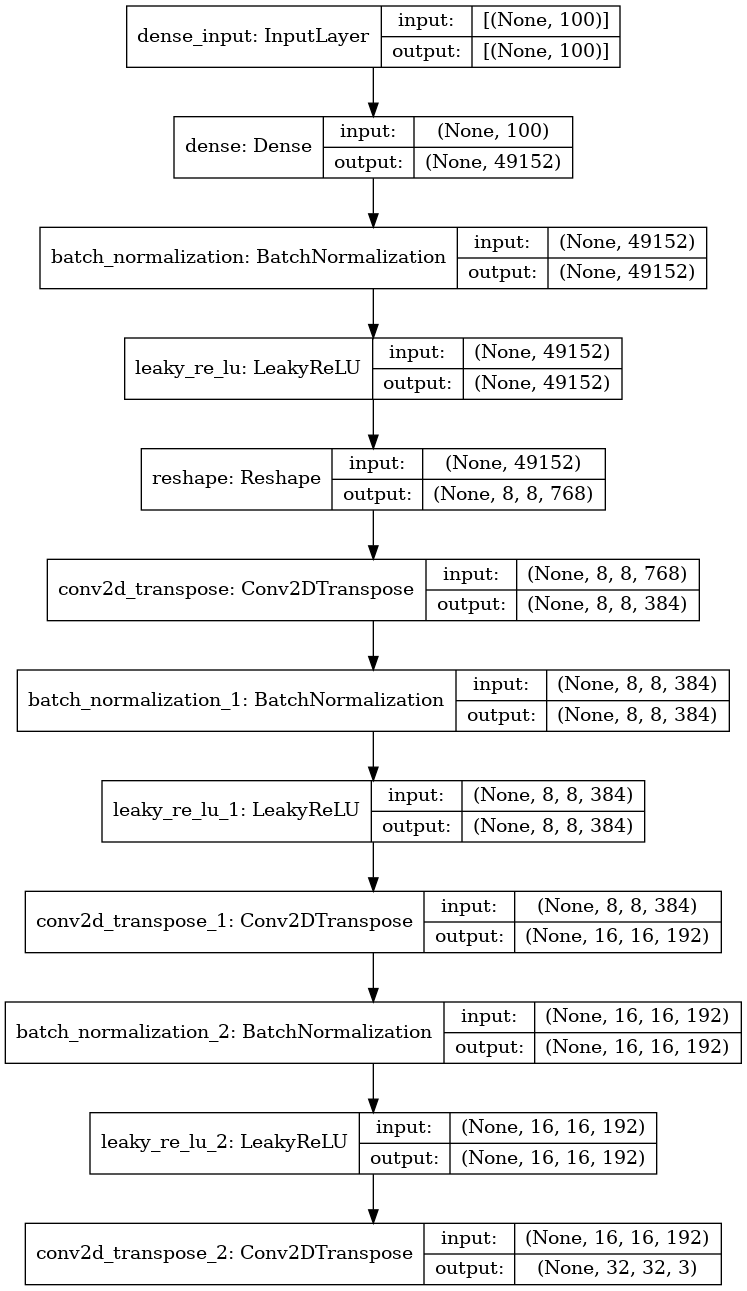

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(generator, 'generator_model_1.png', show_shapes=True)

큰 의미 없지만 이번에도 모델 박스를 시각화해봤습니다. ~~뭔가 멋있어 보여서...~~

In [ ]:
noise = tf.random.normal([1, 100])

noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.48497358,  0.7386492 , -1.6047761 , -1.2636533 ,  0.0705525 ,
        -0.28810382,  0.59523046,  0.5298797 ,  1.258461  , -0.55504495,
         0.14834082, -0.334325  ,  0.25595546,  0.60692376, -0.4407169 ,
         1.03822   ,  0.17285705, -0.6178344 ,  1.9951541 , -0.87387806,
        -0.10957453,  0.17581822, -0.37250483, -1.2240516 ,  1.1922584 ,
        -2.7557154 , -1.4673953 ,  0.6490669 ,  0.9550064 , -0.28173706,
        -0.40610588,  0.02366379,  1.3068497 ,  1.2241889 , -1.3508871 ,
        -0.9010559 ,  0.55825925,  0.9295841 ,  0.68092823,  0.7568308 ,
         1.6203784 ,  0.65750045,  0.80838543,  0.99009883,  0.5071935 ,
         2.564326  , -1.4032844 , -0.5898602 ,  0.5610948 ,  0.22299097,
        -1.5432936 ,  1.1209363 ,  0.20211723, -1.2165416 , -0.7965239 ,
         1.023765  , -0.45872858, -0.25350276,  0.47309303,  0.49298784,
        -1.2449968 , -0.37797537,  0.45031855,  0.9173686 ,  0.01766568,
 

난수 생성기로 노이즈를 만들어봅시다.

모델이 잘 만들어진다면 이 값들이 멋진 이미지로 출력될 것입니다.

In [ ]:
generated_image = generator(noise, training=False)

generated_image.shape

TensorShape([1, 32, 32, 3])

확인 차 노이즈를 모델에 넣어봅시다.

오류가 없고 원하는 (32, 32, 3)의 사이즈가 나왔다면 성공한겁니다.

In [ ]:
generated_image

<tf.Tensor: shape=(1, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.35417131e-03,  4.15382383e-04, -8.61937529e-04],
         [-8.22750386e-04,  6.28897513e-04, -3.94926826e-03],
         [-2.16730894e-03,  1.47052470e-03, -3.05908523e-03],
         ...,
         [-1.27106905e-05,  1.17329694e-03,  1.06878451e-03],
         [-6.87584281e-04, -2.64433073e-03,  1.61450112e-03],
         [-3.08336481e-03, -8.85232352e-04,  3.98437260e-04]],

        [[ 2.70143407e-03,  8.69336596e-04, -2.01905426e-03],
         [-3.83201218e-03,  7.88574666e-03,  1.11086061e-03],
         [ 4.34251316e-03, -3.34224780e-03, -3.61209107e-03],
         ...,
         [-7.87566323e-03,  2.36350507e-03,  5.37102716e-03],
         [ 6.54819072e-04, -2.08421098e-03, -1.36865152e-03],
         [-4.02961770e-04, -7.54134357e-03, -3.04386253e-03]],

        [[ 7.43370270e-04,  2.44185823e-04,  2.30030296e-03],
         [ 2.10502418e-03,  7.44850747e-03,  8.73019733e-03],
         [-5.19766426e-03,  5.05663641e-03, 

모델을 빠져나온 노이즈의 값들을 확인해봅시다.

단순히 100개의 난수를 가지던 배열이 (32, 32, 3)의 배열로 출력되었습니다.

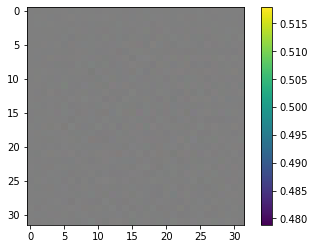

In [ ]:
plt.imshow(tanh_nomr(generated_image[0]))
plt.colorbar()
plt.show()

이미지로 출력해도 문제가 없는 배열입니다.

아직은 학습을 하지 않은 모델이라 알 수 없는 난수 그대로의 이미지가 출력됩니다.

#### *판별자 모델*

In [ ]:
def make_discriminator_model(): # 판별자 모델

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(192, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(384, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(3))

    return model

이번에도 아직은 잘 모르니까 최종 출력층만 3채널로 맞춰주고 `input_shape`만 신경써줍시다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 192)       14592     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 192)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 192)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 384)         1843584   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 384)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 24576)            

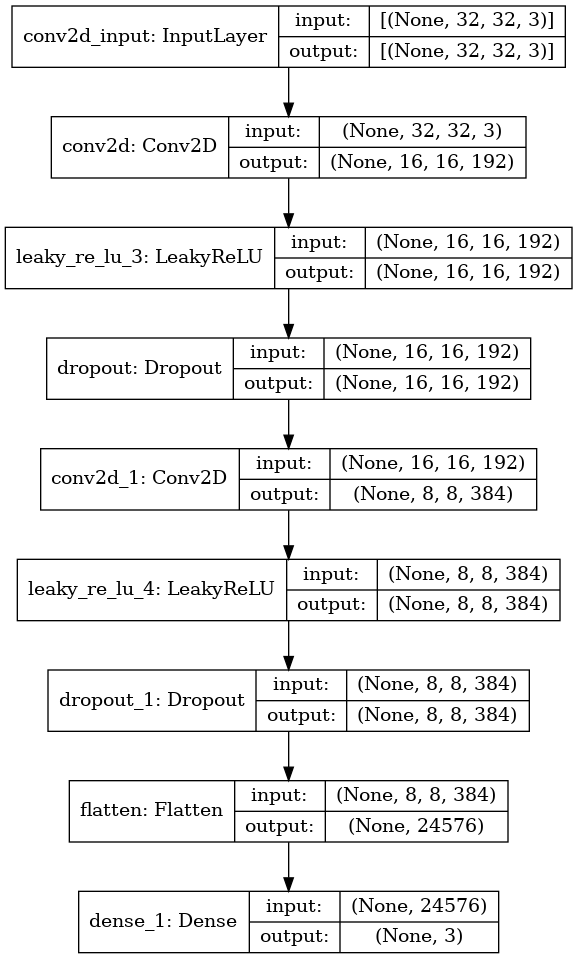

In [ ]:
discriminator = make_discriminator_model()

discriminator.summary()

plot_model(discriminator, 'discriminator_model_1.png', show_shapes=True)

~~역시 뭔가 멋있습니다...~~

In [ ]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.0006517 , -0.00141946,  0.00079561]], dtype=float32)>

노이즈 이미지를 판별자 모델에 넣어봅시다.

오류가 안나고 빠져나와서 3개의 값을 가진다면 성공한겁니다.

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

단순히 0과 1 사이에 분포하는 확률값 loss입니다.

하지만 `from_logits`을 True로 주면 내부에서 sigmoid를 이용해 0과 1 사이의 값으로 정규화 한 후 진행한다고는 하는데요.

직접 계산해볼 용기가 안나서 정확히 어떤 식으로 흘러가는 건지는 모르겠습니다.

In [ ]:
vector = [[1., 2., 3.],
          [4., 5., 6.]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

임의로 생성한 벡터와 값을 전부 1로 바꾼 벡터를 준비합니다.

In [ ]:
cross_entropy(tf.ones_like(vector), vector)

<tf.Tensor: shape=(), dtype=float32, numpy=0.08601967>

`vector`를 엔트로피에 넣으려고 하면 오류가 날 수 있는데요.

그럴 땐 벡터의 값을 실수로 바꿔주면 될겁니다.

In [ ]:
def generator_loss(fake_output):
    # 생성자: 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    # 판별자: Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

`ones_like`는 벡터의 모든 값을 1로,  
`zeros_like`는 벡터의 모든 값을 0으로 바꿔주는 함수입니다.

진짜인지에 대한 판별은 1만 가진 벡터와 비교해서 loss를 구하고,  
가짜인지에 대한 판별은 0만 가진 벡터와 비교해서 loss를 구합니다.

생성기는 가짜를 만들지만 진짜인지에 대한 판별을 기대하고 있으니 `ones_like`를 씁니다.

`discriminator_accuracy`(판별기)가 진짜와 가짜를 구분하지 못해 0.5의 정확도를 가지게 하는 것이 생성기의 목표

`tf.math.greater_equal(tf.constant([0.5]))` : 각 원소가 0.5 이상이면 True 아니면 False, `tf.math.less`는 그 반대가 되구요.

그 외는 bool값을 float로 바꾸거나 값들의 평균을 내는 역할을 하는 함수입니다.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

생성 모델과 판별 모델 둘 다 못해도 기본은 한다는 **Adam** 옵티마이저를 러닝레이트 0.0001을 주고 사용하겠습니다.

- - -
### 모델 학습하기

In [ ]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

시드를 고정하고 노이즈를 생성합니다.

사실 특별한 건 아니고 그냥 노이즈를 (16, 100)으로 생성한 것 뿐입니다.

그래서 16개의 노이즈가 앞으로 학습한 모델의 이미지가 될건데, 무슨 레이블을 보고 이미지를 생성할지도 아직 모르죠.

In [ ]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

1번의 epoch마다 진행될 `train_step` 함수입니다.

복잡하니 넘어가죠.

In [ ]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(6, 6))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(tanh_nomr(predictions[i]))
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

gif를 만들기 위한 매 학습 순간의 이미지들을 저장하는 함수입니다.

`plt.savefig` 함수를 다른 이름으로 저장.

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    ax1 = plt.subplot(211)
    plt.plot(history['gen_loss'])
    plt.plot(history['disc_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xticks(visible=False) # x라벨 제거
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    ax2 = plt.subplot(212, sharex=ax1) # ax1과 축을 공유
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

생성기와 판별기의 각 loss와 정확도를 그래프로 시각화해주는 함수입니다.

하지만 학습이 종료될 때 까지는 이 그래프를 보기 힘들겁니다.

loss 그래프를 `plt.show()`를 하고 나면 바로 다음 학습의 노이즈 이미지들을 출력하기 시작하니까요.

`plt.show()`를 하기 전에 loss plot 컨테이너와 노이즈 이미지 plot 컨테이너를 함께 묶을 수 있었다면 좋았을텐데 말이죠.

In [ ]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

모델의 학습을 저장해주는 함수입니다.

모델을 저장했다가 나중에 불러와서 학습을 이어서 할 수 있고, 파일을 공유할 수도 있습니다.

In [ ]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

학습을 해주는 메인 함수입니다.

loss의 시각화, 이미지 저장, 학습 체크포인트 저장까지 모두 담겨있습니다.

- - -
### 모델 학습 결과
#### *model_1*

아래는 지금까지 위에서 만든 첫 번째 모델의 학습 결과입니다.

총 150번의 epochs를 진행했습니다.

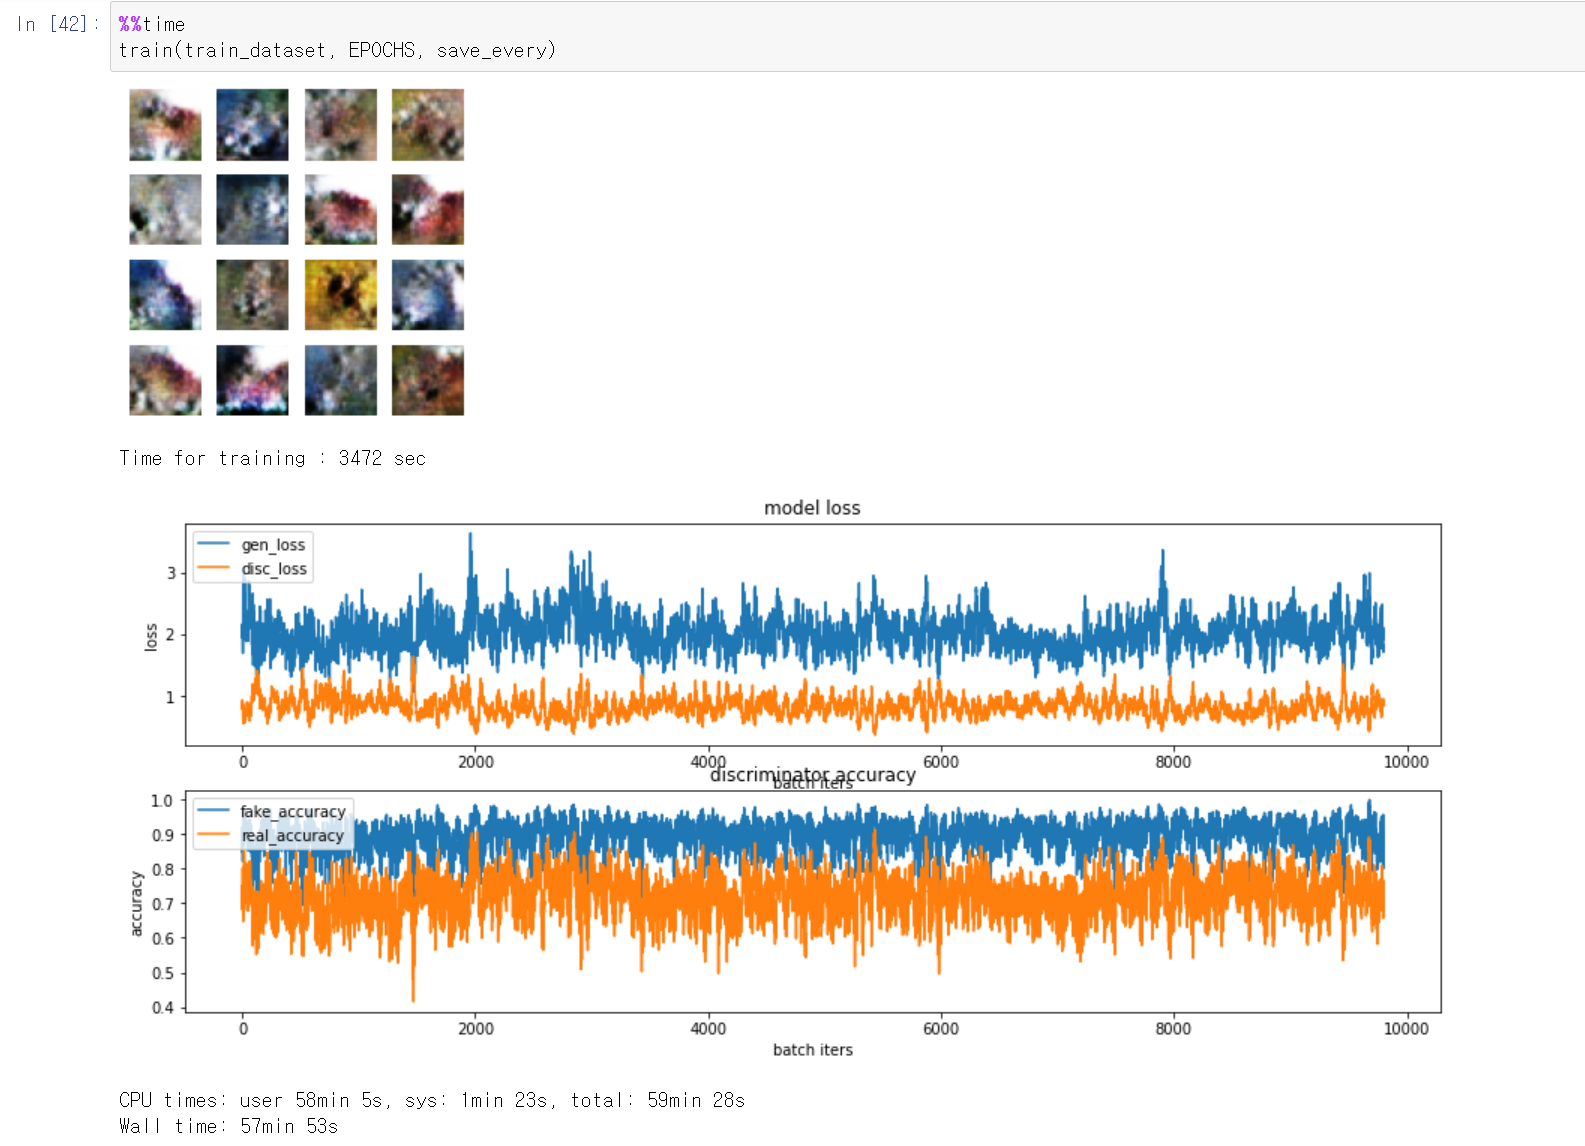

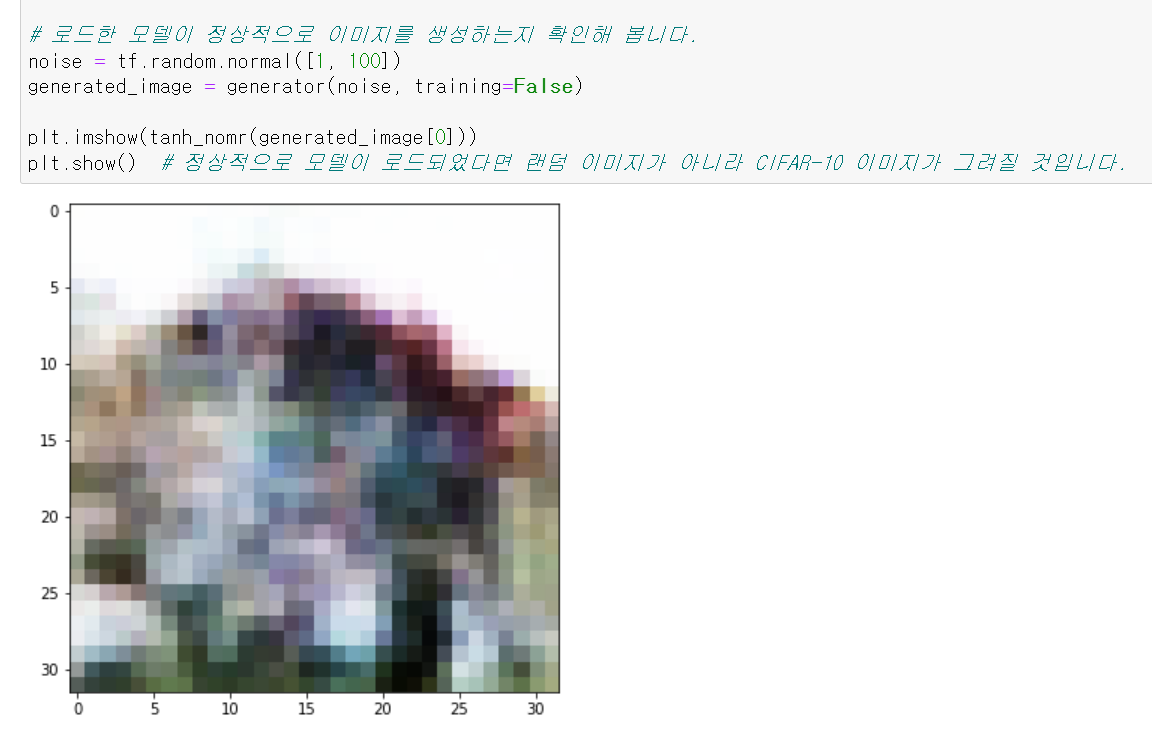

집의 형상이 만들어졌습니다.

레이블에는 집이 없었는데?????

뭔가 좀 만들어지는 것 같다 싶어 계속 학습을 반복한 게 오히려 독이 된 것 같습니다.

비지도 학습도 오버피팅은 있나 보군요.

처음 만져본 모델이라 gif를 확인하는 것 조차 생략해버렸습니다.

**제 프로젝트를 참고하시는 그루분들은 꼭 새로운 모델을 시도하기 전에 <u>이전 모델의 gif를 백업해두고  
generated_samples 폴더의 내용을 모두 비워주세요</u>.. 혹은 새폴더를 생성하거나..  
추가로 학습을 하는 것도 gif가 이전 epochs와 스스로 이어져서 만들어지지 않습니다...**

- - -
### 모델 학습 결과
#### *model_2*

아직 문제가 뭔지는 감이 안잡히니 가장 단순하게 생각해서 *'32x32의 크기가 너무 제한적인 게 아닌가?'*

싶어 리사이즈를 시도한 두 번째 모델입니다.

이미지의 크기를 128x128로 변경했고 데이터의 크기가 증가함에 따라 메모리 이슈가 나가지고 데이터와 타협 결과

50000개에서 30000개의 데이터, float16 형식으로 변환했습니다.  
~~실은 224x224를 하고 싶었지만...~~

그리고 일부 논문을 참고해 생성기 모델에 Dropout을 추가하고, 판별기의 러닝레이트를 0.0004로 늘리고 100epochs 학습을 진행한 결과입니다.

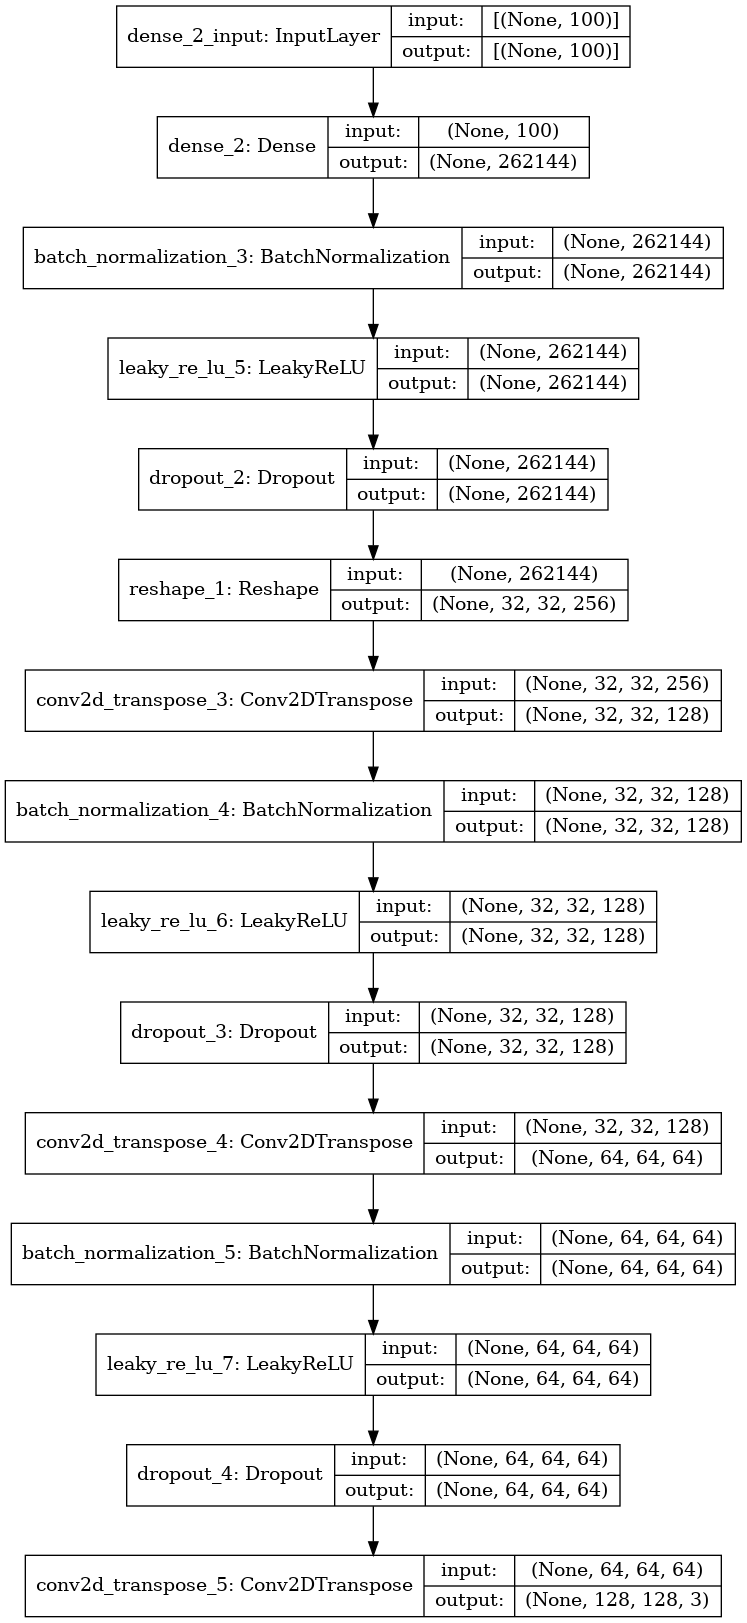

                                        ↓판별기 모델                       생성기 모델↑

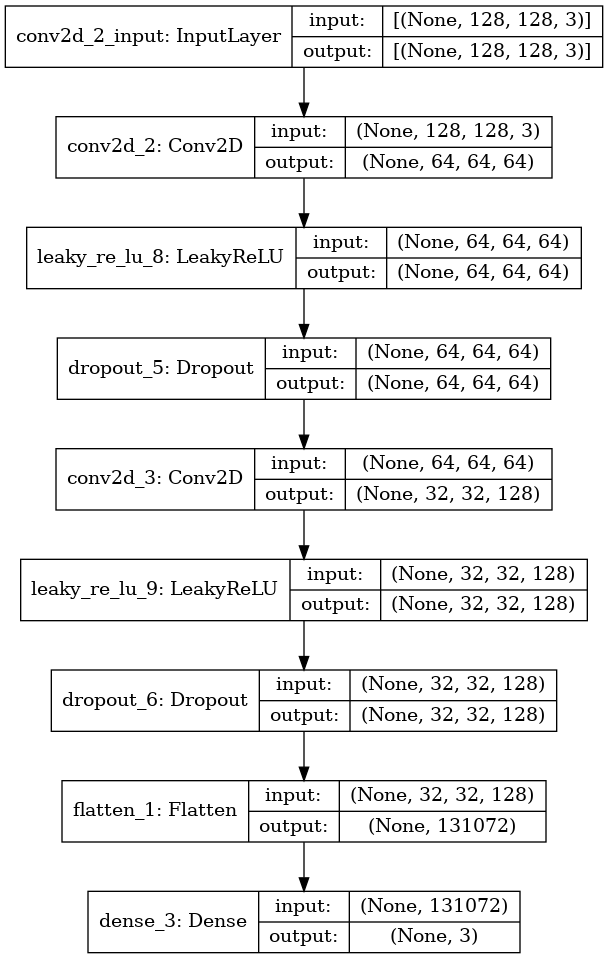

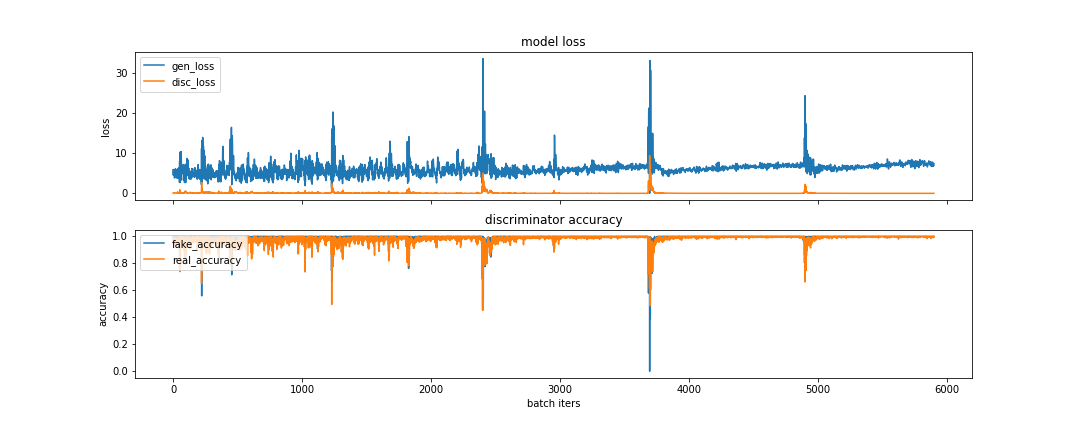

궁극적으로 저희가 원하는 것은 fake accuracy의 정확도가 0.5에 수렴하는 것입니다.

하지만 두 번째 모델은 택도 없군요.

**이건 또 마지막 노이즈 이미지는 백업을 안해두고 gif만 백업해놨어 아오씨...  
지금 이 글을 보고 계신 그루분들은 저와 같은 실수를 꼭 하지 않으셔야 합니다.**

![cifar10_dcgan_model_2](https://user-images.githubusercontent.com/112140135/197800015-eddc1282-4892-497f-863b-b08cc5963a79.gif)


- - -
### 모델 학습 결과
#### *model_3*

업스케일링은 효과가 없었습니다.

다시 원본 사이즈로 돌아와서 레이어를 이리저리 만져보는 길을 택했습니다.

그러다 문득 든 생각은 바로 *'노이즈가 매 번 다른 레이블의 이미지를 학습하는 것이 아닐까?'*

텐서플로우가 아무리 대단하다지만 직접 돌아가는 동작을 볼 수 없는 이상 의구심이 들기 시작했습니다.

그렇다면 이 문제를 어떻게 해결할 수 있을까 싶어서 간단한 것 부터 시도해본 것이 바로 배치사이즈 였습니다.

확신은 별로 서지 않는 가설이였지만 변수 하나만 수정해주면 되니 바로 실행에 나섰죠.

그렇게 뜻 밖의 결과물을 얻은 것이 세 번째 모델입니다.

크게 변경된 점은 다시 원본 그대로의 데이터를 사용했다는 것과 `BATCH_SIZE`를 노이즈 개수와 일치하도록 16으로 두고  
100epochs를 진행한 모델입니다.

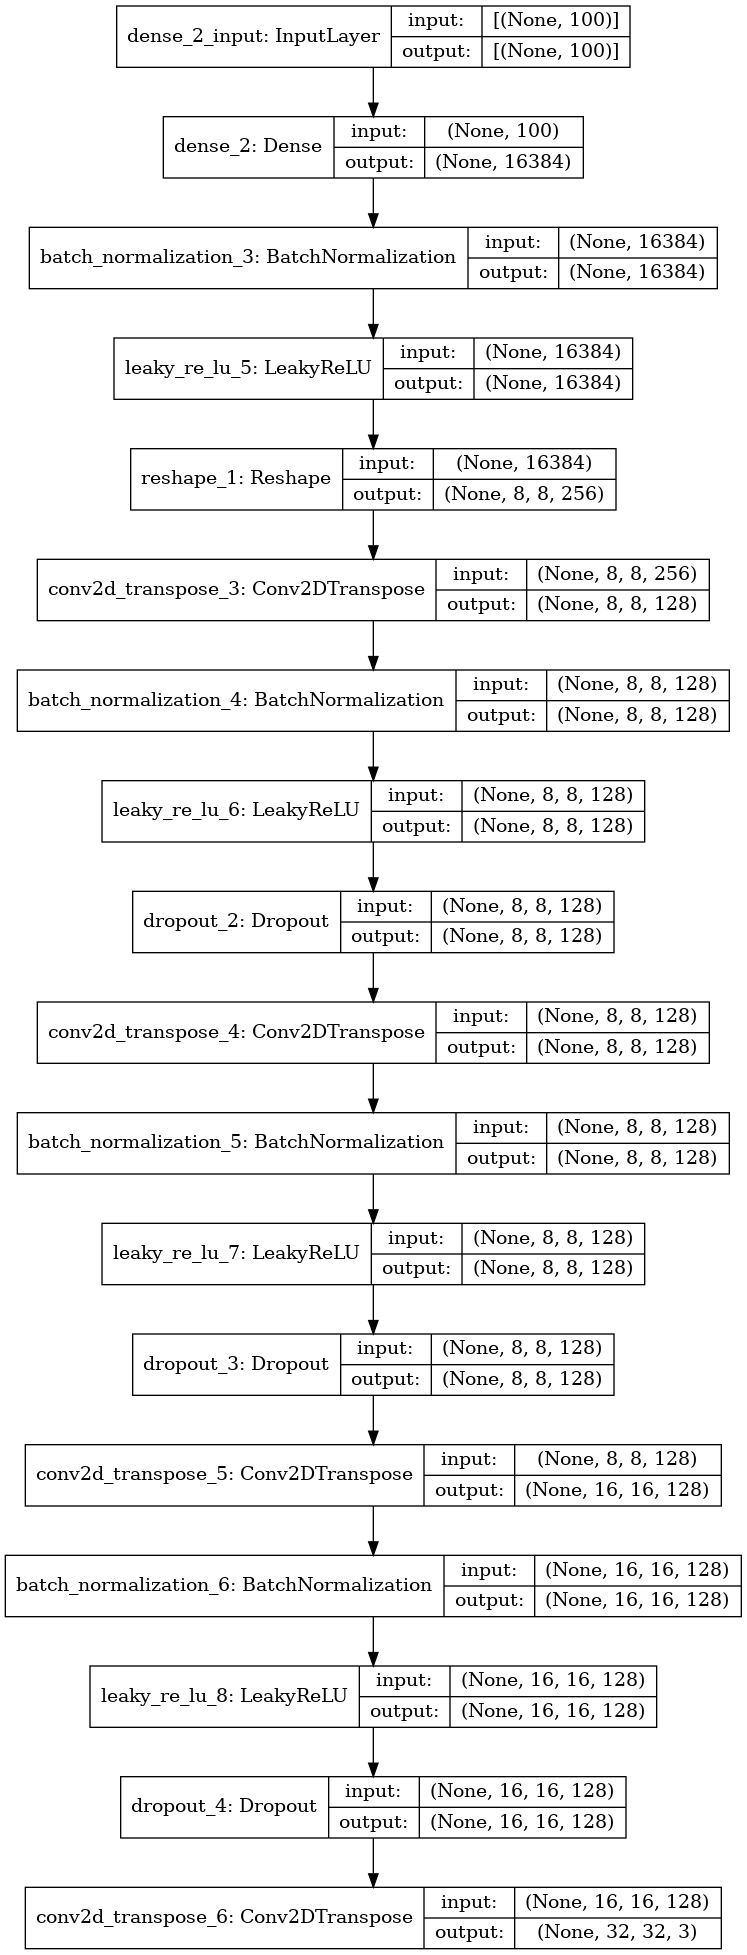

                                        ↓판별기 모델                       생성기 모델↑

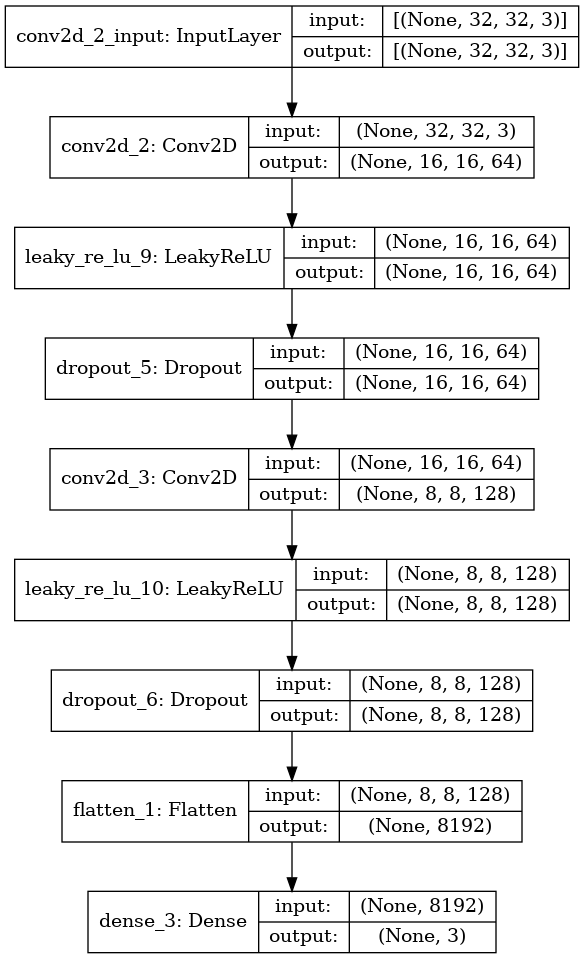

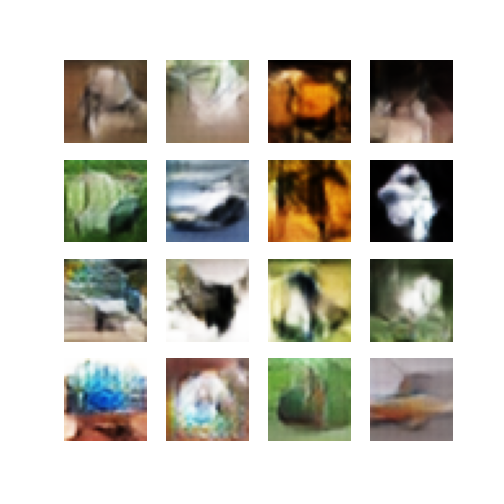

~~공작+오리다!!~~

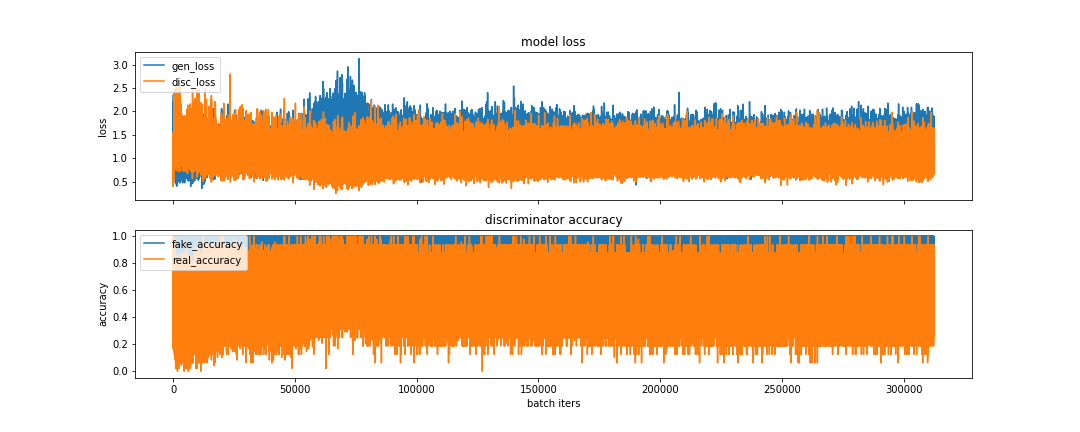

아니 이런..

뭔가 만들어진다 싶었는데 정작 중요한 fake accuracy가 잘 안보입니다.

괜찮습니다. 어차피 이대로 끝낼 생각도 없습니다.

- - -
### 모델 학습 결과
#### *model_4*

거의 다 왔습니다.

그간 보이지 않은~~(보여줄 수 없는)~~ 모델들을 만들면서 터득한 노하우로 레이어를 다시 튜닝한 네 번째 모델입니다.

크게 변경된 점은 생성기의 드롭아웃 레이트를 0.5로 변경하고 판별기에 레이어 한 층을 더 쌓았습니다.

그리고 판별자의 러닝레이트를 0.0003으로 두고 50 epochs를 학습했다가 다시 50 epochs를 추가로 학습한 모델입니다.

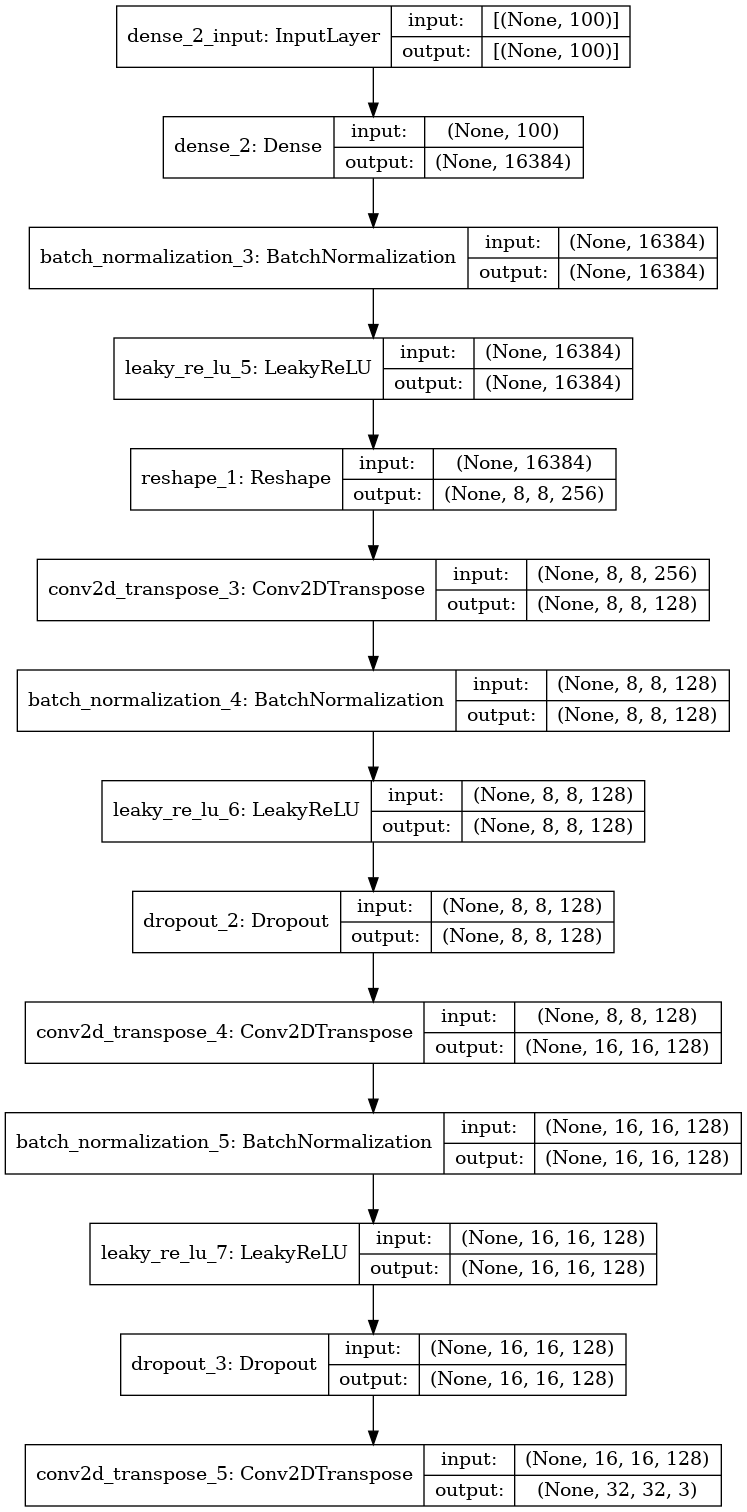

                                        ↓판별기 모델                       생성기 모델↑

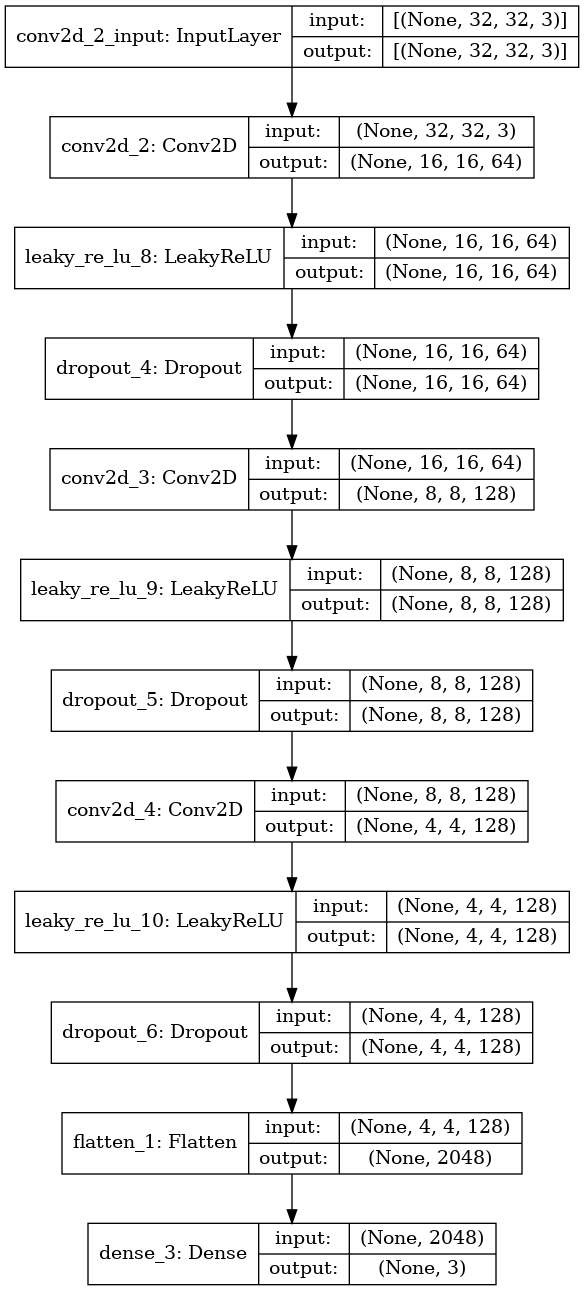

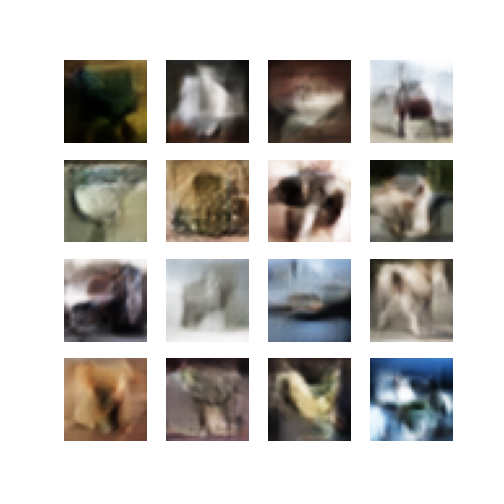

뭐가 만들어진 건지는 모르겠지만 그래도 뭐를 만들려고 했던 건지 정도는 알 수 있을 것 같습니다.

사실 100 epochs가 좀 과해서 되려 찌그러진 듯한 느낌이 들긴 하는데요. 어쩌겠습니까.. 안그럼 gif가 망가지는걸...

아니 망가지긴 이미 망가졌지.. ` ~ 50 epochs는 생략하고 50번 째 epochs부터만 gif에 담겼습니다.. 여러분은 부디 저같은 실수를.. 절대..

![cifar10_dcgan_model_4](https://user-images.githubusercontent.com/112140135/197800258-2107bec2-d772-4a1c-8de4-ce6bc7330395.gif)

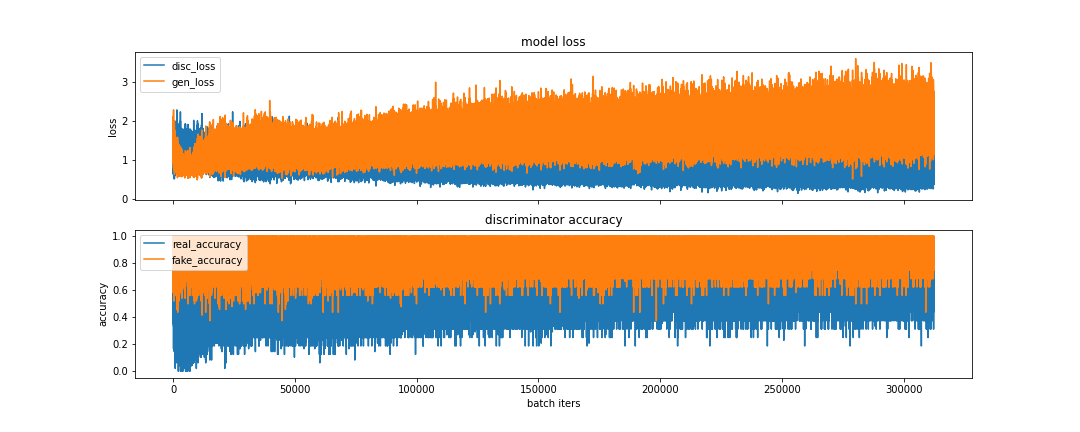

이전 모델의 fake_accuracy가 보이질 않던 학습 외적 문제를 해결하기 위해 fake_accuracy와 real_accuracy의 순서를 바꿨습니다.

노란색이 fake_accuracy이고, 추세상 0.5까지 내려가는 모습이 보입니다.

- - -
### 모델 학습 결과
#### *model_5*

실은 모델4로도 만족하긴 했지만 아직 궁금즘이 남아있어서 시도해보는 마지막 모델입니다.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


메모리 이슈를 심하게 겪어봤으니 메모리를 정리해가며 조심히 다뤄주겠습니다.

In [ ]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_x, label), (_, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

train_x와 label을 함께 가져와줍니다.

벌써 제가 뭘 하려는지 짐작이 가시나요?

In [ ]:
label[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

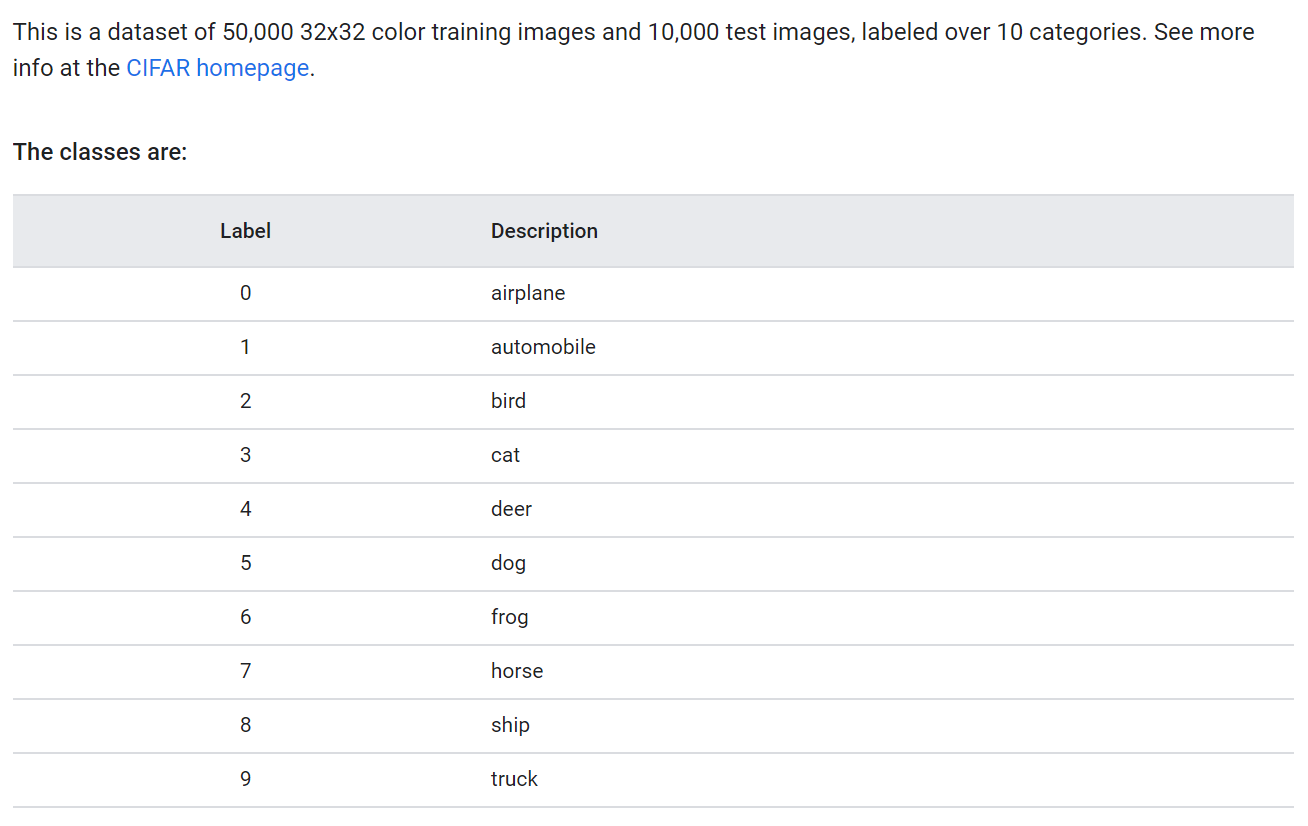

label은 모델1 때 봤던 레이블 정보입니다.

In [ ]:
import pandas as pd

data = pd.DataFrame(train_x.reshape(50000, 32*32*3))

data

0     1     2     3     4     5     6     7     8     9     ...  3062  \
0        59    62    63    43    46    45    50    48    43    68  ...   104   
1       154   177   187   126   137   136   105   104    95   102  ...   136   
2       255   255   255   253   253   253   253   253   253   253  ...    79   
3        28    25    10    37    34    19    38    35    20    42  ...    38   
4       170   180   198   168   178   196   177   185   203   183  ...    78   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
49995   145   161   194   151   166   199   156   171   205   155  ...    57   
49996   255   245   132   254   247   134   255   249   137   254  ...    82   
49997    35   178   235    40   176   239    42   176   241    39  ...    87   
49998   189   211   240   186   208   236   185   207   235   184  ...   165   
49999   229   229   239   236   237   247   234   236   247   231  ...   174   

       3063  3064  3065  3066  3067  3068  3069  3070  3071  
0       216   184   140   151   118    84   123    92    72  
1       143   133   139   143   134   142   143   133   144  
2        78    85    83    79    85    83    80    86    84  
3        54    47    28    63    56    37    72    65    46  
4        75    79    82    71    75    78    73    77    80  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
49995    39    41    56    36    38    53    37    39    54  
49996   249   174    79   252   181    81   253   181    76  
49997    27    52    77    21    43    66    12    31    50  
49998   195   184   169   196   189   171   195   190   171  
49999   179   177   173   164   164   162   163   163   161  

[50000 rows x 3072 columns]

레이블 분류를 위해 제가 다루기 편한 pandas 데이터 프레임으로 바꿔주겠습니다.

In [ ]:
data['label'] = label

data

0    1    2    3    4    5    6    7    8    9  ...  3063  3064  \
0       59   62   63   43   46   45   50   48   43   68  ...   216   184   
1      154  177  187  126  137  136  105  104   95  102  ...   143   133   
2      255  255  255  253  253  253  253  253  253  253  ...    78    85   
3       28   25   10   37   34   19   38   35   20   42  ...    54    47   
4      170  180  198  168  178  196  177  185  203  183  ...    75    79   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
49995  145  161  194  151  166  199  156  171  205  155  ...    39    41   
49996  255  245  132  254  247  134  255  249  137  254  ...   249   174   
49997   35  178  235   40  176  239   42  176  241   39  ...    27    52   
49998  189  211  240  186  208  236  185  207  235  184  ...   195   184   
49999  229  229  239  236  237  247  234  236  247  231  ...   179   177   

       3065  3066  3067  3068  3069  3070  3071  label  
0       140   151   118    84   123    92    72      6  
1       139   143   134   142   143   133   144      9  
2        83    79    85    83    80    86    84      9  
3        28    63    56    37    72    65    46      4  
4        82    71    75    78    73    77    80      1  
...     ...   ...   ...   ...   ...   ...   ...    ...  
49995    56    36    38    53    37    39    54      2  
49996    79   252   181    81   253   181    76      6  
49997    77    21    43    66    12    31    50      9  
49998   169   196   189   171   195   190   171      1  
49999   173   164   164   162   163   163   161      1  

[50000 rows x 3073 columns]

순서가 엉키지 않게 label를 추가해줍니다.

In [ ]:
data['label'].value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: label, dtype: int64

레이블의 분포를 확인해봤습니다.

정직하게 1:1:1:1:1:1:1:1:1:1 비율이군요.

In [ ]:
data = data.loc[data['label']==1] # automobile
del data['label']

data

0     1     2     3     4     5     6     7     8     9     ...  3062  \
4       170   180   198   168   178   196   177   185   203   183  ...    78   
5       159   102   101   150    91    95   153    95    97   154  ...    14   
32       50    64    37    51    63    41    42    55    41    62  ...   165   
44      139   154   188   144   160   192   146   162   192   148  ...    66   
45       54    31    18    59    34    19    56    37    22    49  ...   102   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
49977   255   254   255   255   254   255   255   255   255   254  ...   252   
49989   250   252   249   246   248   245   247   249   246   245  ...   251   
49993   226   214   177   225   212   177   225   207   168   226  ...   123   
49998   189   211   240   186   208   236   185   207   235   184  ...   165   
49999   229   229   239   236   237   247   234   236   247   231  ...   174   

       3063  3064  3065  3066  3067  3068  3069  3070  3071  
4        75    79    82    71    75    78    73    77    80  
5       166    47    14   173    51    17   182    57    19  
32      176   169   166   176   168   166   173   165   162  
44      129   117    80   128   114    75   112   105    59  
45       98   121   111    96   117   106    92   112   101  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
49977   255   255   255   254   254   254   255   255   255  
49989   252   254   251   252   254   251   252   254   251  
49993    96   127   122    95   126   122    93   126   119  
49998   195   184   169   196   189   171   195   190   171  
49999   179   177   173   164   164   162   163   163   161  

[5000 rows x 3072 columns]

가장 결과가 좋을 것 같은, 추상적으로 봤을 때 `아 이거 자동차다` 라고 쉽게 우길 수 있을 것 같은 자동차 레이블을 이용하겠습니다.

In [ ]:
type(data)

pandas.core.frame.DataFrame

바로 이미지를 확인해보고 싶지만 DataFrame은 이미지로 표현할 수 있는 배열 형식이 아닙니다.

In [ ]:
data = np.array(data)

type(data)

numpy.ndarray

만능 array 형식으로 바꿔줍니다.

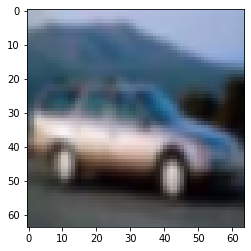

In [ ]:
import cv2

sample = cv2.resize(data[0].reshape(32, 32, 3), dsize=(64, 64))

plt.imshow(sample)
plt.show()

역시 자동차가 나왔습니다.

In [ ]:
data.shape

(5000, 3072)

데이터프레임으로 넣었을 때 1차원으로 바꿨으니 (32, 32, 3)의 배열 정보가 (3072) 상태로 보존되어 있습니다.

학습을 하려면 도로 이미지 출력에 적합한 배열로 바꿔줘야겠지만 아직은 아닙니다.

In [ ]:
def img_upscaling(img):
    img = img.reshape(32, 32, 3)
    return cv2.resize(img, dsize=(64, 64))

data = np.apply_along_axis(img_upscaling, 1, data)

data.shape

(5000, 64, 64, 3)

1차원 상태로 있으면 넘파이의 배열을 함수에 일괄 적용해줄 수 있기 때문이죠.

반복문으로 쓸 때보다 훨씬 빠릅니다. ~~파이썬 때문에 반복문을 쓰기 싫어지는 병에 걸렸습니다.~~

데이터의 수가 50000개에서 5000개로 줄었으니 이젠 메모리 이슈도 없겠다, 모델2에서 못다한 업스케일링의 효과도 함께 확인해봅시다.

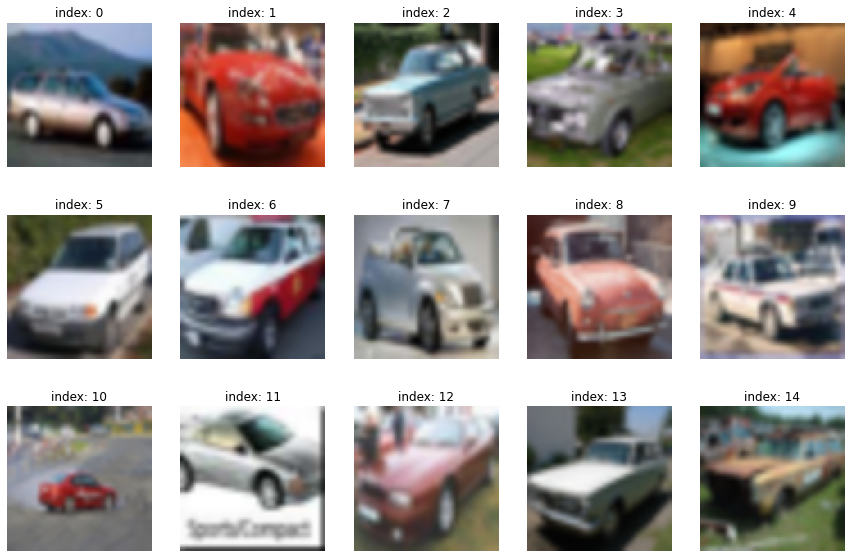

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(data[i])
    plt.title(f'index: {i}')
    plt.axis('off') # x, y 눈금 제거
    
plt.show()

앞에서 15개의 이미지를 가져와도 전부 자동차 이미지들 뿐입니다.

In [ ]:
data = (data - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

In [ ]:
BUFFER_SIZE = 5000
BATCH_SIZE = 10

train_dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

이번 프로젝트의 핵심 파라미터 `BATCH_SIZE`를 마찬가지로 데이터셋의 크기에 비해 작게 설정해줍니다.

In [ ]:
def make_generator_model(): # 생성자 모델

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.5))

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.5))
    
    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [ ]:
generator = make_generator_model()

generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 128)       819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)      

출력층의 모양이 (64, 64, 3)인 것도 확인해줍니다.

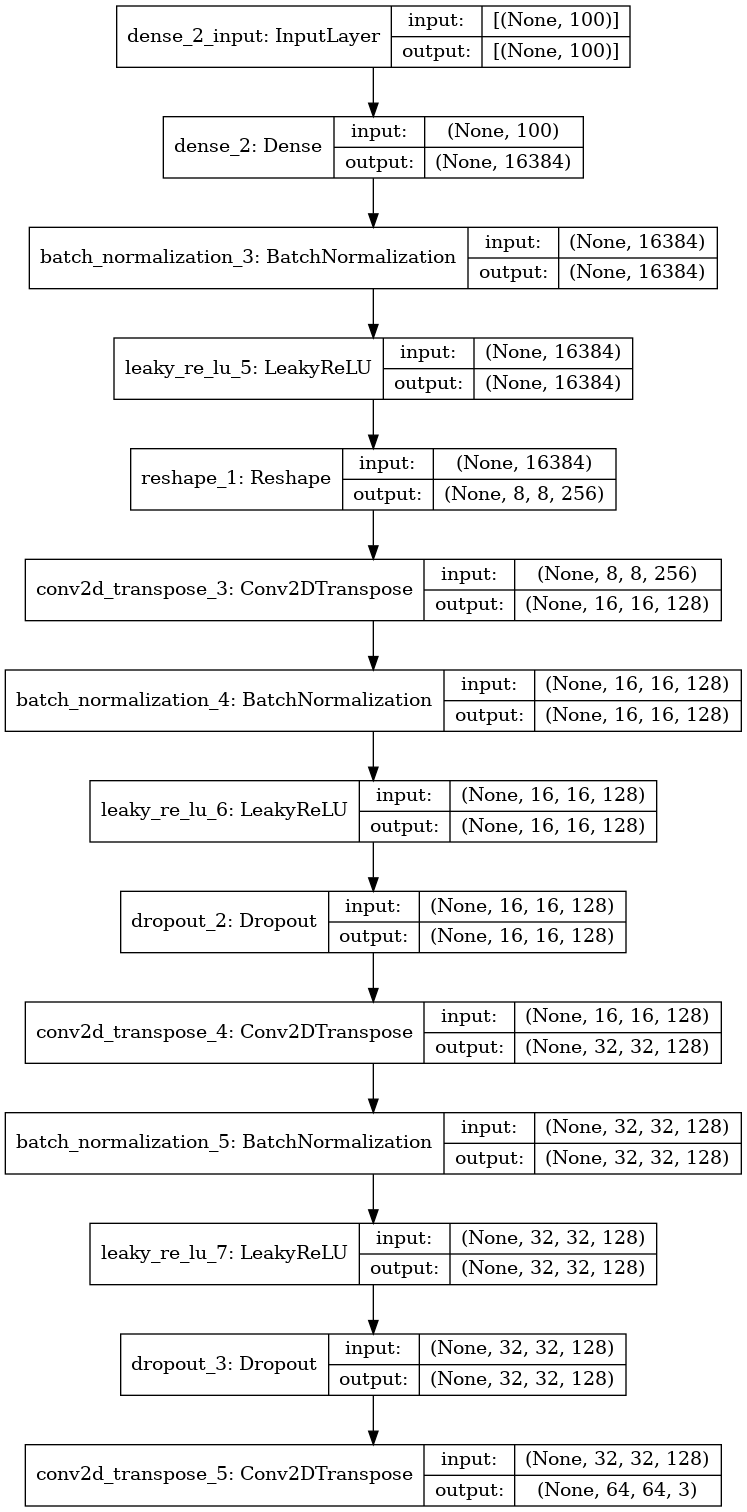

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(generator, 'generator_model_5.png', show_shapes=True)

In [ ]:
noise = tf.random.normal([1, 100])

generated_image = generator(noise, training=False)

generated_image.shape

TensorShape([1, 64, 64, 3])

노이즈를 생성기 모델에 넣으면 무사히 빠져나오는지도 확인해줍니다.

In [ ]:
def make_discriminator_model(): # 판별자 모델

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(3))

    return model

In [ ]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

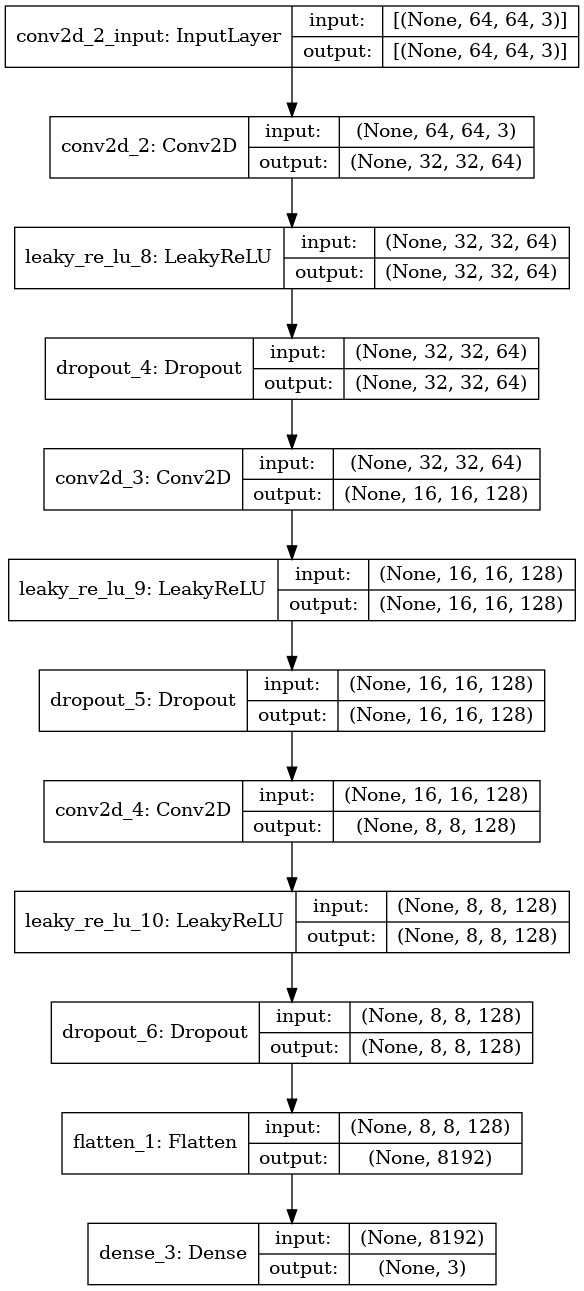

In [ ]:
plot_model(discriminator, 'discriminator_model_5.png', show_shapes=True)

In [ ]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 7.7088102e-05,  9.4523351e-04, -1.4131756e-03]], dtype=float32)>

생성기를 빠져나온 노이즈가 판별기도 무사히 빠져나오는지 확인해줍니다.

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    # 생성자: 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    # 판별자: Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(0.0001) # 러닝레이트
discriminator_optimizer = tf.keras.optimizers.Adam(0.0003)

생성기에 0.0001, 판별기에 0.0003의 러닝레이트를 줬습니다.

In [ ]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [ ]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [ ]:
tanh_nomr = lambda x: (x+1)/2 # 0 ~ 1 사이의 수로 다시 정규화

def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(7, 7))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(tanh_nomr(predictions[i]))
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch+100, it))

    plt.show()

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    ax1 = plt.subplot(211)
    plt.plot(history['disc_loss'])
    plt.plot(history['gen_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xticks(visible=False)
    plt.legend(['disc_loss', 'gen_loss'], loc='upper left')

    # summarize history for accuracy  
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(history['real_accuracy'])
    plt.plot(history['fake_accuracy']) # fake_accuracy가 더 중요하니 상위 레이어로 오도록
    plt.title('discriminator accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('batch iters')
    plt.legend(['real_accuracy', 'fake_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [ ]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

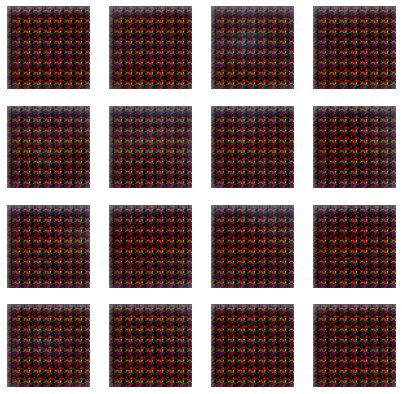

Time for training : 16 sec


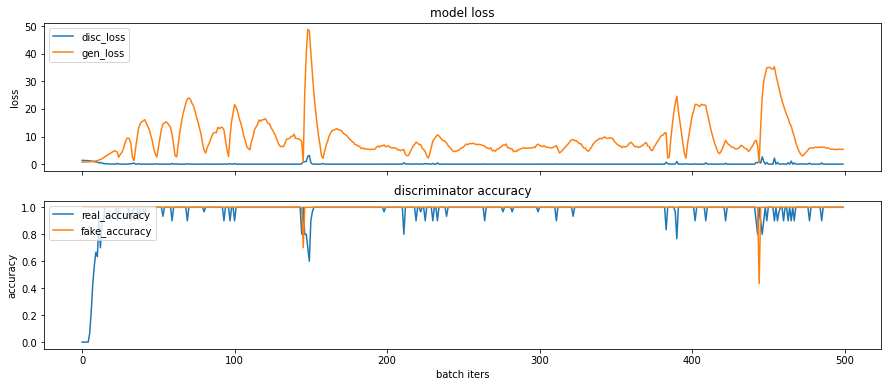

CPU times: user 16.7 s, sys: 2.52 s, total: 19.2 s
Wall time: 17.2 s


In [ ]:
%%time
train(train_dataset, 1, 1)

학습을 시작해놓고 딴 거 하러 가기 전에 1epochs와 세이브까지 실행해보면서

오류가 없는 지 확인해줍니다.

가끔 `save_every`가 5인데 4 epoch까지 오류가 없다가 5 epoch에서 저장에 오류가 생기면 학습이 멈춰있습니다.

In [ ]:
save_every = 5
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

100 epochs 달립니다.

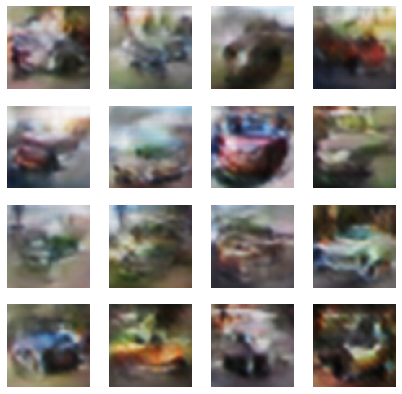

Time for training : 1749 sec


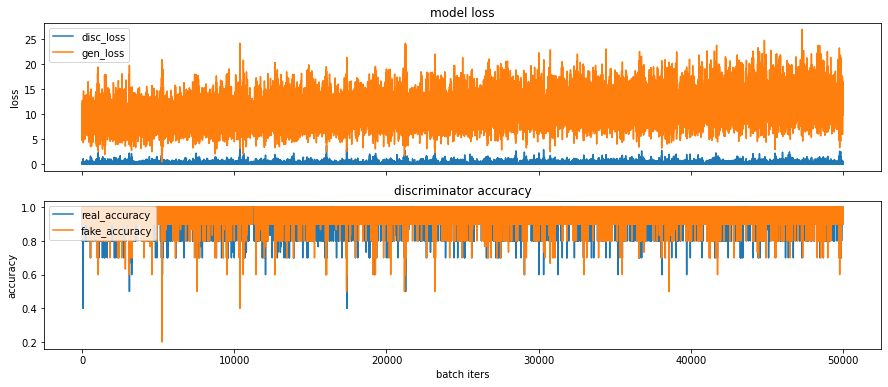

CPU times: user 28min 53s, sys: 3min 51s, total: 32min 45s
Wall time: 29min 11s


In [ ]:
%%time
train(train_dataset, EPOCHS, save_every)

..엥?

지금까지 '각각의 레이블마다 필요한 적정 학습량이 모두 달라서 생기는 결과다' 라는 제 가설이 보기 좋게 빗나가는 모습을 보셨습니다.

70x70 크기로 바꾸면 효과가 좋다던 논문은 뭐였죠?

In [ ]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/fashion_mnist_dcgan.gif

ls: cannot access '/aiffel/aiffel/dcgan_newimage/cifar10/fashion_mnist_dcgan.gif': No such file or directory


그래도 마지막 모델만큼은 gif를 무사히 사수했네요.

gif로 봤을 때의 모델 결과물은 나름 괜찮게 보이니 이거라도 내야겠습니다.

![cifar10_dcgan_model_5](https://user-images.githubusercontent.com/112140135/197800388-fc2fbb46-b967-41c6-8baa-f6ccb1facfa9.gif)

- - -
## 마무리하며

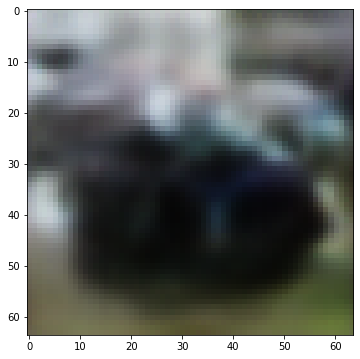

In [ ]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(tanh_nomr(generated_image[0]))
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

이건 모델 체크포인트를 불러오는 건데요.

저는 한 번도 안썼습니다. ~~뭐 마음에 드는 모델이 있어야지~~

- *아직 풀지 못 한 문제*

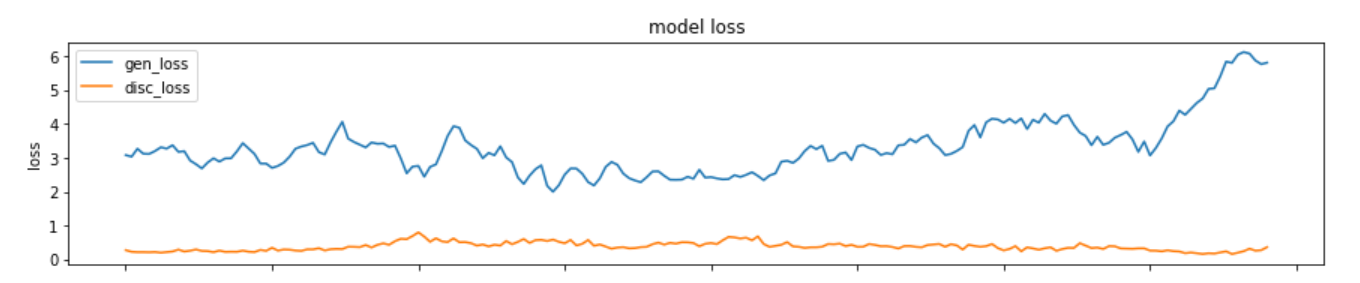

문제1 : 초기의 판별기 loss가 너무 낮음

문제2 : 생성기의 loss는 올라가는 것에 비해 판별기의 loss가 빠르게 내려감, 균형이 맞지 않음, 자고로 라이벌이란..

여러 논문에서도 위 문제를 다루는 것 같긴 했었는데요. 아직 이렇다 할 좋은 해결 방법이 없나 봅니다.

- - -
모델1을 만들면서 '아 뭐야 예제에서 채널만 3채널로 바꾸면 끝이네? 쉽잖아' 라고 생각한 저를 반성합니다.

모델2부터 지옥이 시작했던 것 같습니다.

단순히 리사이즈만 하면 될 줄 알았던 게...

일반적인 방법으로 리사이즈를 하니 브로드캐스트가 맞지 않다는 이상한 소리를 하질 않나..

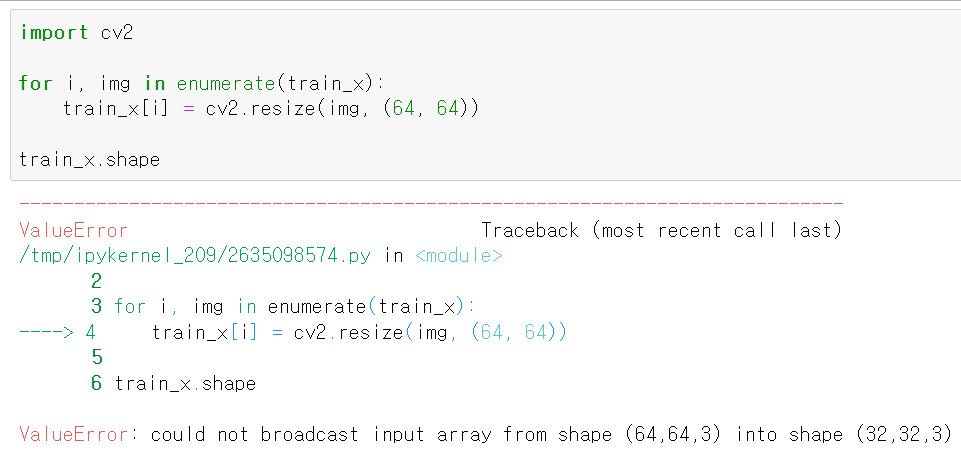

그래서 결국 빈 리스트를 만들고 반복문으로 리사이즈한 데이터를 추가하는 데 커널이 죽어버렸습니다. 메모리가 초과된거죠.

다시 `train_x[i]`를 바꿔주는 방식으로 돌아와서 `cv2.resize`가 문제인가? 하는 생각에 업스케일링 함수를 만들어봤습니다.

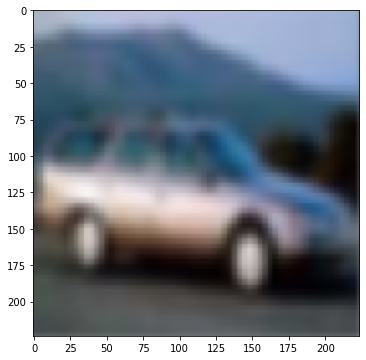

In [ ]:
def img_upscaling(img, size):
    X, Y = size[0], size[1]
    img_X, img_Y, img_Z = img.shape
    
    result = np.zeros(X*Y*img_Z).reshape((X, Y, img_Z))
    step_X = np.array([X/img_X*i for i in range(img_X)] + [X]).astype(int)
    step_Y = np.array([Y/img_Y*i for i in range(img_Y)] + [Y]).astype(int)
    
    for z in range(img_Z):
        ch = np.pad(img[:, :, z], ((0,1),(0,1)), 'constant', constant_values=0)
        for i, x in enumerate(step_X[1:]):
            sx = x - step_X[i]
            for j, y in enumerate(step_Y[1:]):
                sy = y - step_Y[j]
                a, b, c = ch[i, j+1], ch[i+1, j], ch[i, j]
                #t = np.array([[c + ((a - c) / sy * (k / (k+n))) + ((b - c) / sx * (n / (k+n))) if k+n > 0 else c for k in range(sy)] for n in range(sx)])
                t = np.array([[c + ((((a - c) / sy * k) + ((b - c) / sx * n)) / 2) for k in range(sy)] for n in range(sx)])
                result[step_X[i]:x, step_Y[j]:y, z] = t
    
    return result

sample = img_upscaling(data[0], (224, 224))

plt.imshow(tanh_nomr(sample))
plt.show()

결과물만 보면 좋기는 한데요, 이 함수를 짜느라고 프로젝트는 뒷전으로 두고 몇 시간 동안 머리를 꽁꽁 싸매며 고민했습니다.

그렇게 해서 만들었는데 중요한 건 `cv2.resize` 함수는 아무런 잘못이 없었단 거죠.

브로드캐스트 어쩌구 하는 오류는 제가 만든 함수로도 여전히 났습니다.

이 때 까지만 해도 연산량이 문제인가 싶어 넘파이의 일괄 적용 함수도 열심히 찾아봤습니다.

이것도 몇 시간 동안 고민한 끝에 배열을 1차원으로 바꾸고 `np.apply_along_axis`을 이용해 연산량은 확 줄일 수 있었습니다.

하지만 여전히 커널은 죽어버렸죠.

그제서야 가상환경 커널이 죽어버리는 원인을 찾아본 결과 메모리 부족 때문이라는 것을 알게 됐습니다.

특히 실수가 메모리를 엄청 잡아먹는다는 것을요.

실제로 배열의 값이 정수 상태일 때 리사이즈를 실행하면 멀쩡히 돌아갔습니다.

하지만 모델을 학습하려면 실수가 아니면 안됐고 또 찾아보니 `float64`와 `float32`와 `float16`이 각각 차지하는 메모리의 양이 다르단 것도 알게 되었습니다.

그렇게 탄생한 모델2가 128x128 크기에 데이터 3만개, `float16`이 된거죠.

그런데 모델은 제 노력을 배신했고, 저는 메모리의 소중함만을 깨달았습니다.